In [21]:
import numpy as np
import pandas as pd
from PIL import Image
import requests
import time
from scipy import signal

In [2]:
url = 'https://static.boredpanda.com/blog/wp-content/uploads/2016/03/hairy-fluffy-cat-sky-the-ragdoll-31.jpg'
im = Image.open(requests.get(url, stream=True).raw)

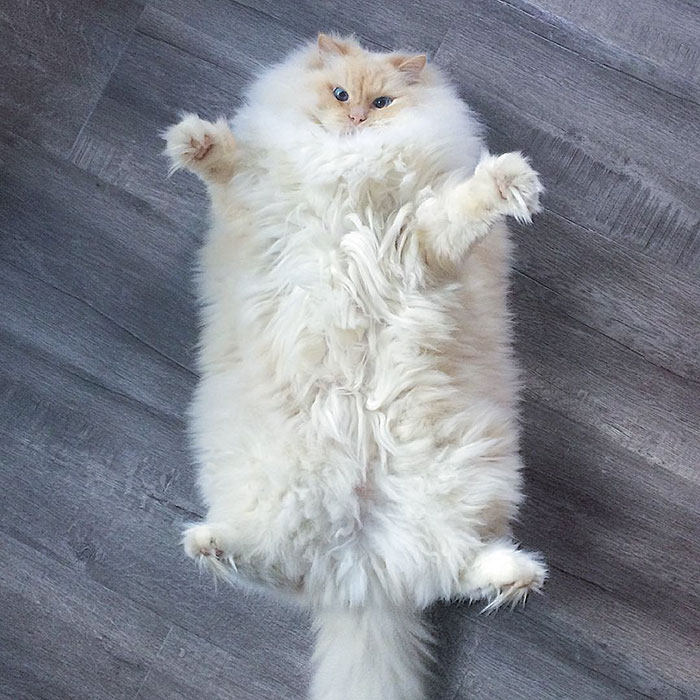

In [3]:
im

In [4]:
def energy_gradient(img):
    height = img.shape[0]
    width = img.shape[1]
    energy = np.empty((height, width))
    for i in range(height):
        for j in range(width):
            L = img[i, (j-1) % width]
            R = img[i, (j+1) % width]
            U = img[(i-1) % height, j]
            D = img[(i+1) % height, j]
            
            dx_sq = np.sum((R - L)**2)
            dy_sq = np.sum((D - U)**2)
            energy[i,j] = np.sqrt(dx_sq + dy_sq)
    return energy

In [32]:
def seams_map_dp(img, energy):
    r, c, _ = img.shape

    M = energy.copy()
    backtrack = np.zeros_like(M, dtype=np.int)

    for i in range(1, r):
        for j in range(0, c):
            if j == 0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 1])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack

In [33]:
def carve_column_mask(img, m, backtrack):
    r,c,_ = img.shape
    mask = np.ones((r, c), dtype=np.bool)
    j = np.argmin(m[-1])
    for i in reversed(range(r)):
        mask[i, j] = False
        j = backtrack[i, j]
    mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((r, c - 1, 3))
    return img

In [38]:
def seam_carve(img, new_size, energy_function, seam_map_function, carve_function):
  img = np.asarray(img)
  old_range = img.shape[1]
  start_time = time.clock()
  for i in range(new_size, old_range):
    print(i)
    energy = energy_function(img)
    map,backtrack = seam_map_function(img, energy)
    img = carve_function(img, map, backtrack)
  end_time = time.clock()   
  return img, end_time-start_time  

In [39]:
res,time = seam_carve(im, 650, energy_gradient, seams_map_dp, carve_column_mask)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


650


KeyboardInterrupt: 

In [ ]:
Image.fromarray(res)

In [28]:
def color_to_gray(img):
     return (img[:,:,0] + img[:,:,1] + img[:,:,2])/3.0

In [36]:
def gradient_magnitude_sobel_operator(img):
    image = color_to_gray(img)
    filter = np.array([[1,0,-1],[2,0,-2],[1, 0, -1]])
    new_image_x = signal.convolve2d(image, filter)
    new_image_y = signal.convolve2d(image, np.flip(filter.T, axis=0))
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    return gradient_magnitude

In [40]:
res,time = seam_carve(im, 650, gradient_magnitude_sobel_operator, seams_map_dp, carve_column_mask)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


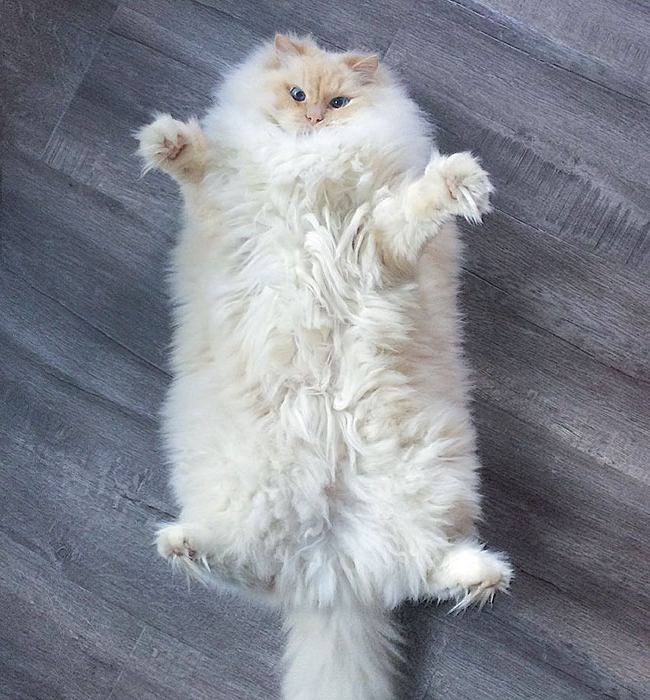

In [41]:
Image.fromarray(res)

In [42]:
time

204.57246500000008